In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

import warnings
warnings.filterwarnings('ignore')

In [38]:
df=pd.read_csv('insurance.csv')
pd.set_option('display.max_columns', None)


In [39]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


We have 1000 Rows and 40 rows.

In [40]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We have _c39 with 1000 column blank so we will considering removing that.

In [41]:
df=df.drop(columns='_c39')

Here the output column is fruad_reported

We have 39 columns left. 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Separating the numerical and categorical variables to get better visualisation.

In [43]:
col=[]
for i in df.columns:
    if df[i].dtypes == 'object':
        col.append(i)

In [44]:
col

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [45]:
for i in col:
    print(df[i].value_counts())
    
    

05-08-1992    3
28-04-1992    3
01-01-2006    3
03-01-2004    2
25-05-1990    2
             ..
15-08-2002    1
03-10-2014    1
21-08-1994    1
29-04-2010    1
19-09-2009    1
Name: policy_bind_date, Length: 951, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64

    We are able to see here that the dates are in object format, we will change that into dateformat going further.

    There are three state: OH: 352 IL: 338 IN: 310
                
    There are three Polcy csl, 250/500: 351, 100/300: 349, 500/1000: 300
    
    There are 537 Female and 463 Male
    
    Education level: JD             161
                     High School    160
                     Associate      145
                     MD             144
                     Masters        143
                     PhD            125
                     College        122
    Occupation: machine-op-inspct    93
                prof-specialty       85
                tech-support         78
                sales                76
                exec-managerial      76
                craft-repair         74
                transport-moving     72
                priv-house-serv      71
                other-service        71
                armed-forces         69
                adm-clerical         65
                protective-serv      63
                handlers-cleaners    54
                farming-fishing      53
    
    Hobbies: reading           64
             exercise          57
             paintball         57
             bungie-jumping    56
             movies            55
             camping           55
             golf              55
             kayaking          54
             yachting          53
             hiking            52
             video-games       50
             skydiving         49
             base-jumping      49
             board-games       48
             polo              47
             chess             46
             dancing           43
             sleeping          41
             cross-fit         35
             basketball        34
          
    Relationship: own-child         183
                  other-relative    177
                  not-in-family     174
                  husband           170
                  wife              155
                  unmarried         141
                  
    Incident Type: Multi-vehicle Collision     419
                   Single Vehicle Collision    403
                   Vehicle Theft                94
                   Parked Car                   84
    
    
    Collision Type: Rear Collision     292
                    Side Collision     276
                    Front Collision    254
                    ?                  178
           
    Incident severity: Minor Damage      354
                       Total Loss        280
                       Major Damage      276
                       Trivial Damage     90
       
    
     Auth contacted: Police       292
                     Fire         223
                     Other        198
                     Ambulance    196
                     None          91                  
         
     Incident state: NY    262
                     SC    248
                     WV    217
                     VA    110
                     NC    110
                     PA     30
                     OH     23
                     
      City: Springfield    157
            Arlington      152
            Columbus       149
            Northbend      145
            Hillsdale      141
            Riverwood      134
            Northbrook     122
            
      Property Damage: ?      360
                       NO     338
                       YES    302
      
      Police report: NO     343
                     ?      343
                     YES    314
                     
      Make: Suburu        80
            Saab          80
            Dodge         80
            Nissan        78
            Chevrolet     76
            Ford          72
            BMW           72
            Toyota        70
            Audi          69
            Volkswagen    68
            Accura        68
            Jeep          67
            Mercedes      65
            Honda         55
            
      Model:RAM               43
            Wrangler          42
            A3                37
            Neon              37
            MDX               36
            Jetta             35
            Passat            33
            Legacy            32
            A5                32
            Pathfinder        31
            Malibu            30
            Camry             28
            Forrestor         28
            92x               28
            95                27
            F150              27
            E400              27
            Grand Cherokee    25
            93                25
            Tahoe             24
            Escape            24
            Maxima            24
            X5                23
            Ultima            23
            Civic             22
            Silverado         22
            Highlander        22
            Fusion            21
            TL                20
            ML350             20
            CRV               20
            Impreza           20
            Corolla           20
            3 Series          18
            C300              18
            X6                16
            M5                15
            Accord            13
            RSX               12

We are able to see that there are few columns where ? is there:
    
    1: Collision type 178
    2: Property damage 360
    3: Police report 343

Let us change the ? to Nan values first so that we can impute.

In [46]:
df = df.replace('?',np.NaN)

In [47]:
df.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

Now we have values changed to nan, now we can go ahead to impute the data using simple imputer.

In [48]:
from sklearn.impute import SimpleImputer

In [49]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['collision_type'] = imp.fit_transform(df['collision_type'].values.reshape(-1, 1))

As the other two variables are in Yes and no, let is make all the columns as NO as if the police report was not done, there is a possibility that ? is been put and the same goes for Property damage as well, if there was any damage, it should have been reported hence imputing the missing column values by NO.

Using fill na to impute the na values to No.

In [50]:
df['property_damage'].fillna('NO', inplace = True)

In [51]:
df['police_report_available'].fillna('NO', inplace = True)

In [52]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

Now here, the data is blank and we do not have any null values here.

    Deleting unnecessary columns to make sure that the data is clean.

In [53]:
df = df.drop(['policy_number','policy_bind_date', 'incident_date','incident_location','auto_model', 'incident_hour_of_the_day'], axis = 1)


Policy number: This is something that the company decides which cannot trigger fraud.
    
Policy Bind date: When we checked the unique values, we noted that in 1000 rows 951 dates are there which is discreete and cannot contribute much to the output.
    
Incident date: The date when we make the claim has no relation with the fraud.

Incident location: as we have the state, this column is not necessary to guage.
    
Automodel: we have the company of the car and hence model do not give a significant different in the data.

In [54]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,YES,1,2,YES,71610,6510,13020,52080,Saab,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,1,NO,0,0,NO,5070,780,780,3510,Mercedes,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,1,NO,0,1,NO,6500,1300,650,4550,Accura,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,1,YES,0,1,NO,87200,17440,8720,61040,Honda,2006,N
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,1,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,3,NO,2,3,YES,67500,7500,7500,52500,Suburu,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,1,NO,0,1,YES,46980,5220,5220,36540,Audi,1998,N


We have 1000 Rows and 34 columns now.

Let us plot some quick visualisation to get the details further.

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


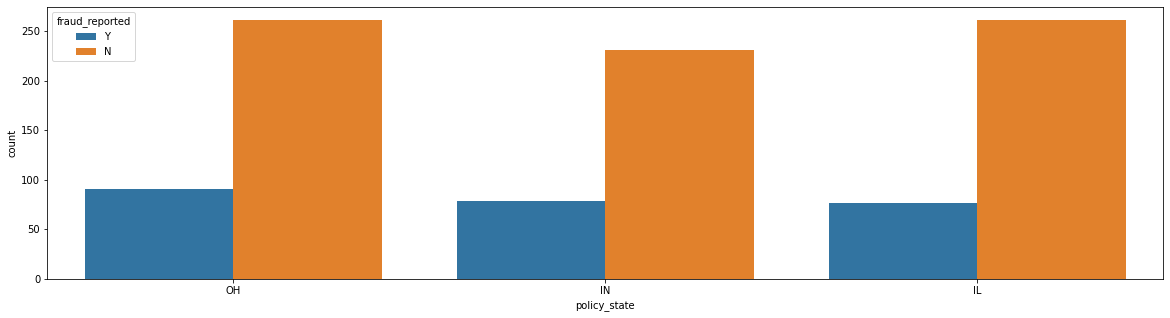

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


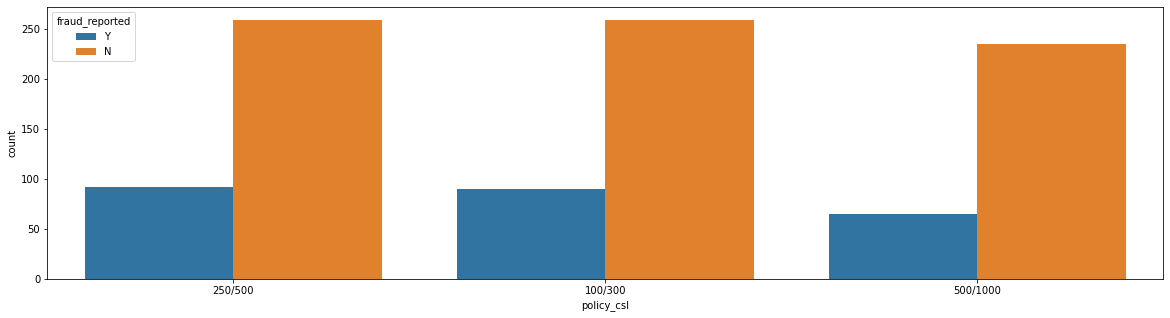

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


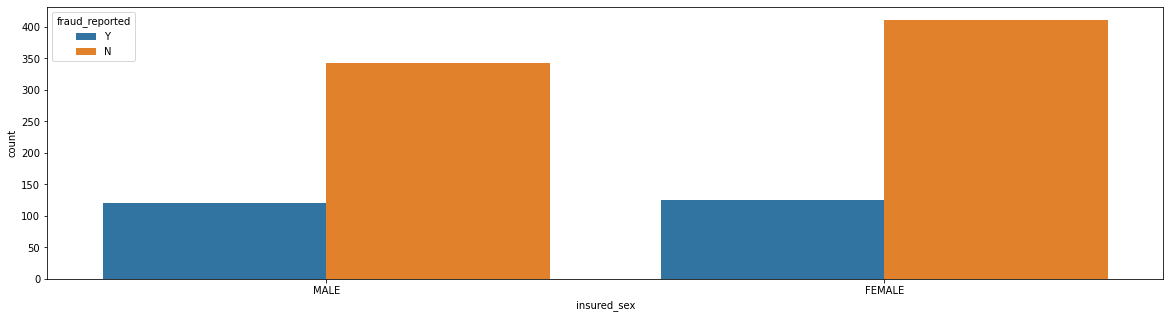

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


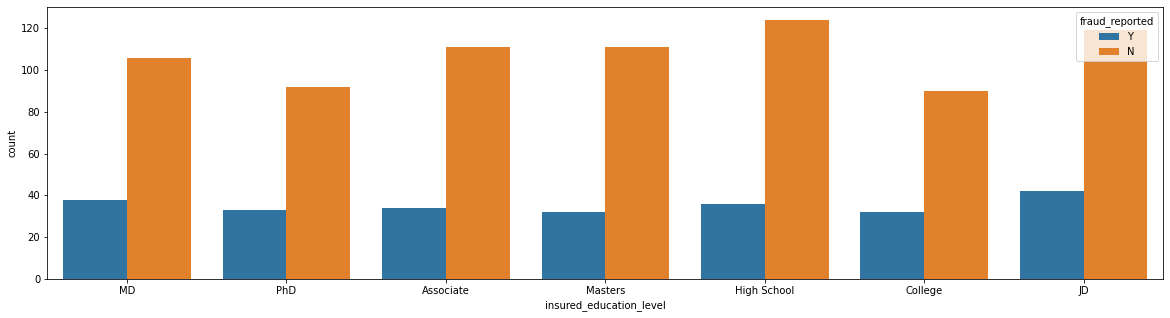

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


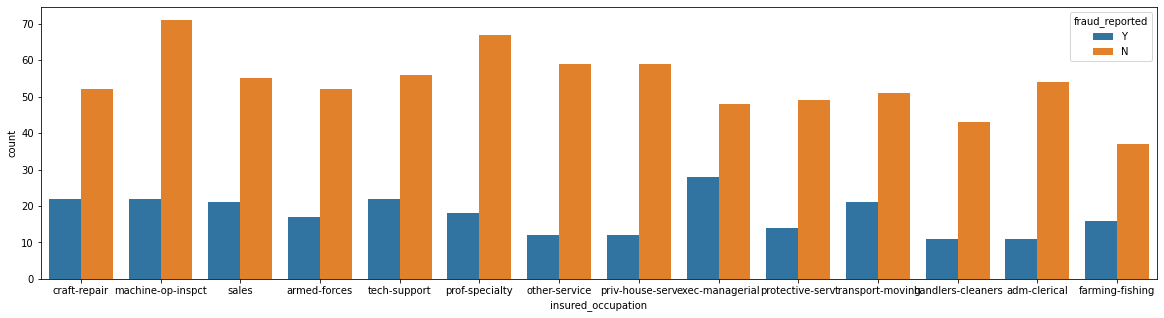

reading           64
paintball         57
exercise          57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


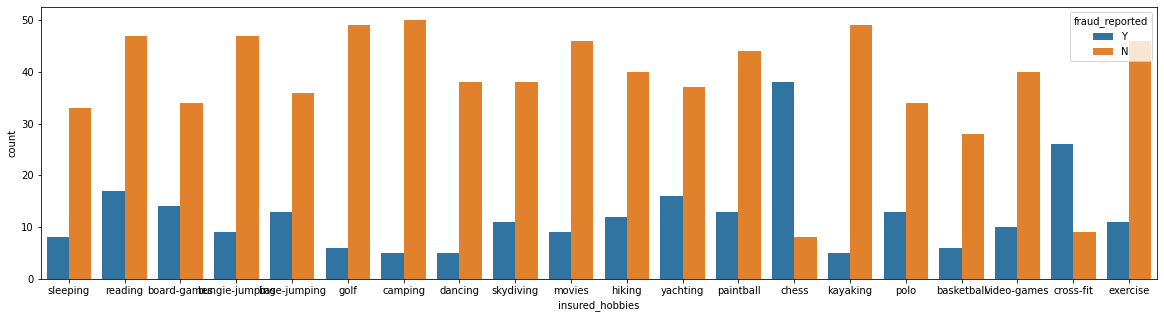

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


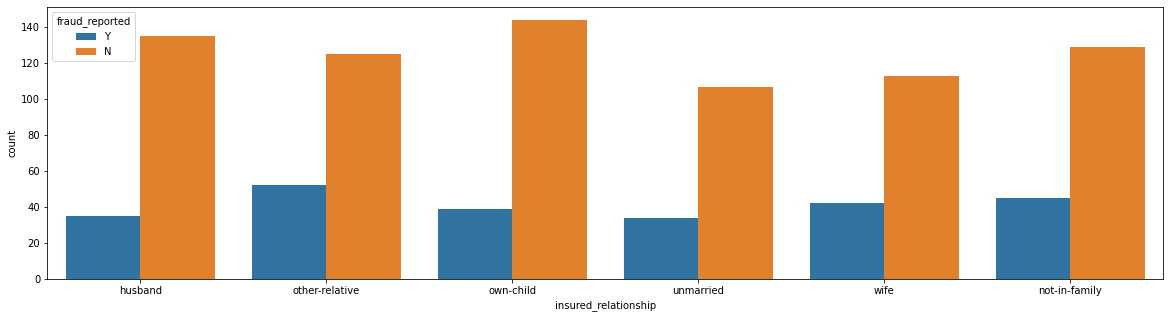

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


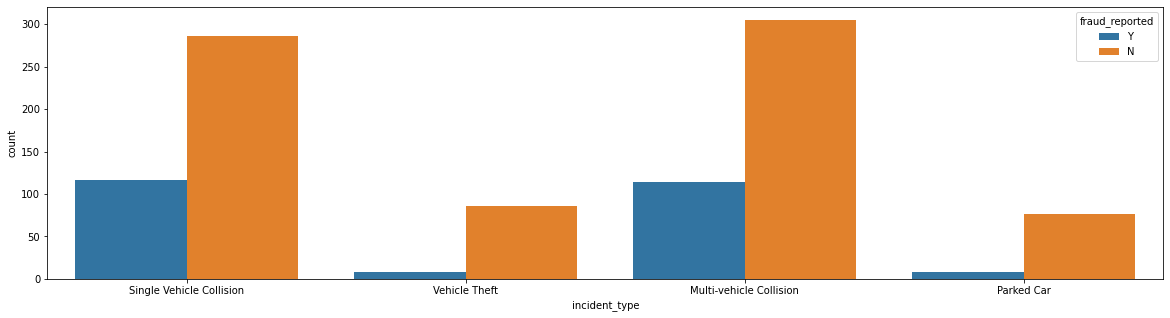

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


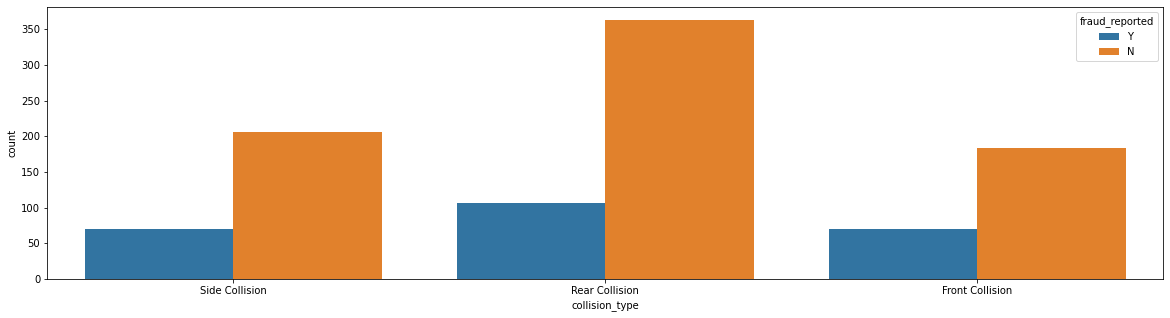

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


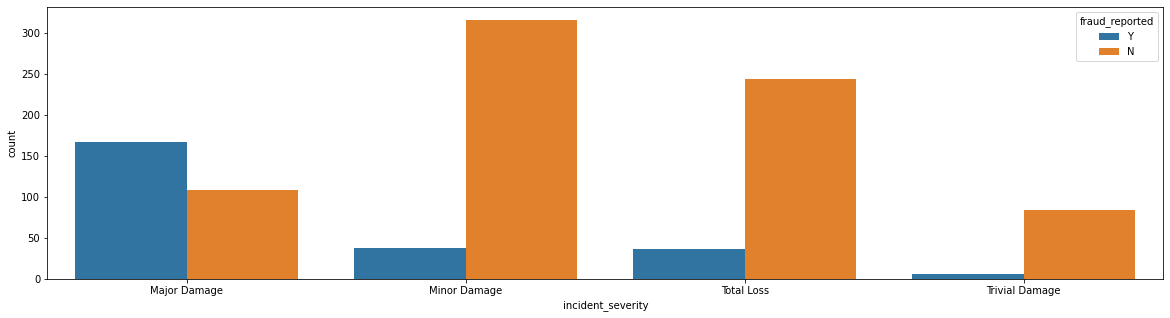

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


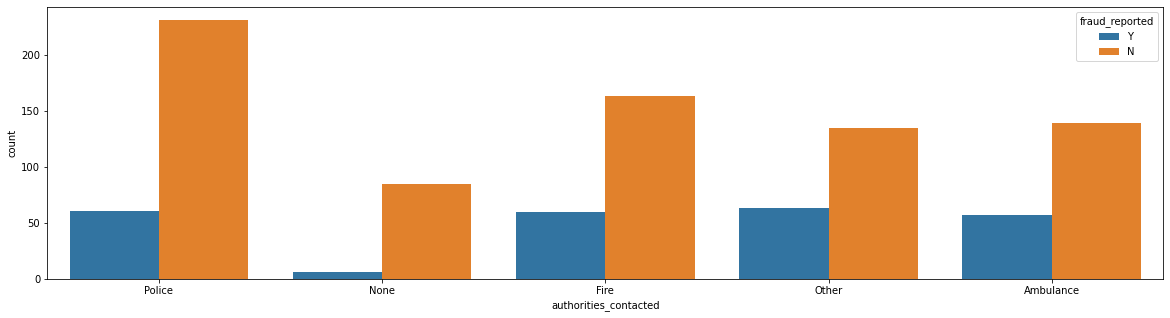

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64


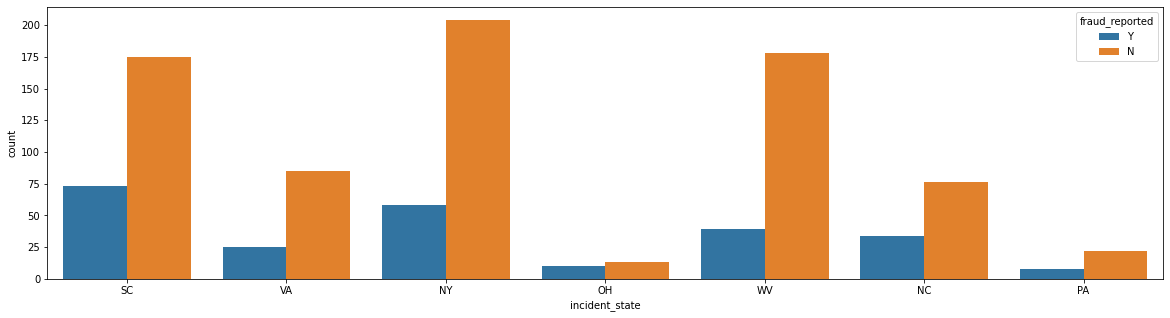

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


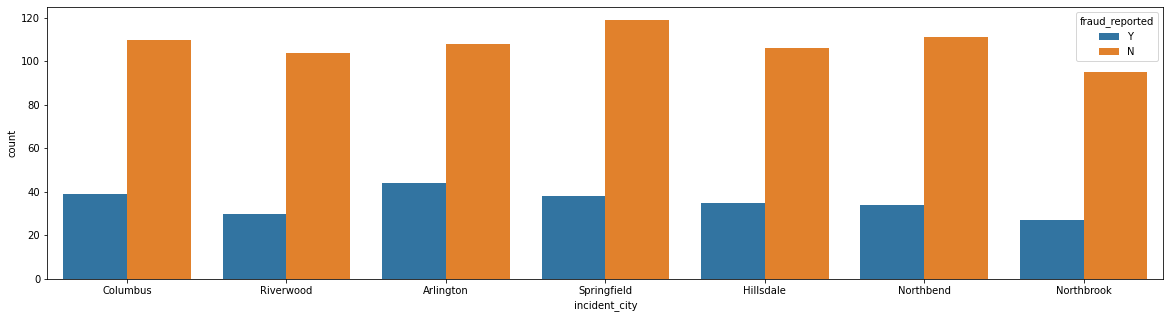

NO     698
YES    302
Name: property_damage, dtype: int64


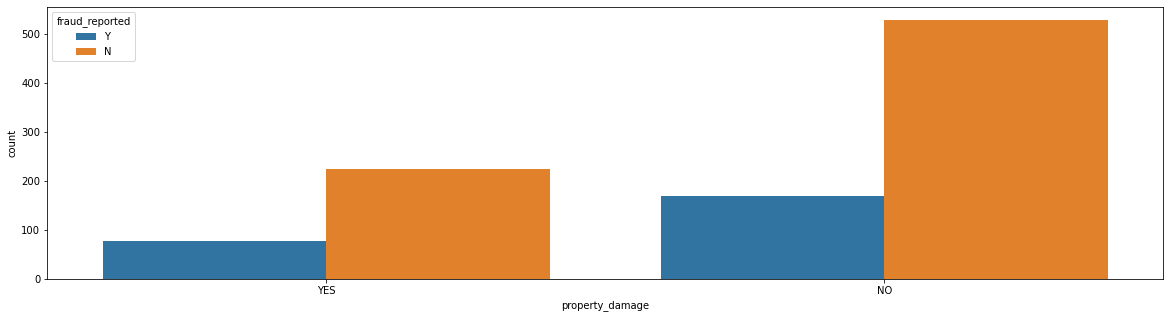

NO     686
YES    314
Name: police_report_available, dtype: int64


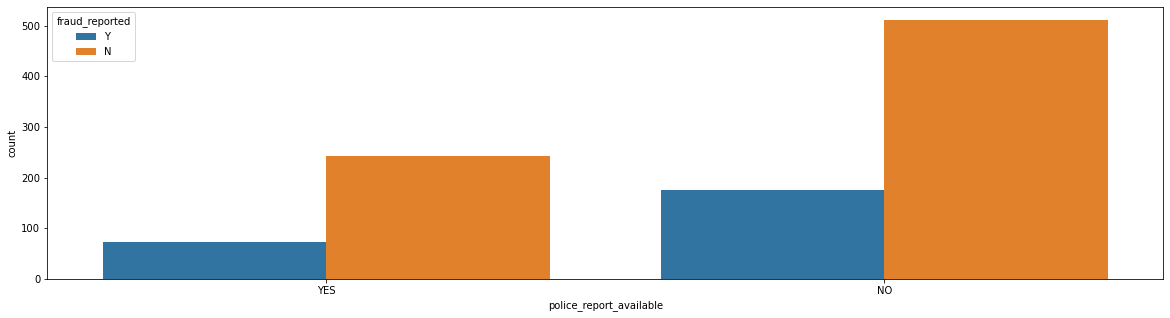

Dodge         80
Saab          80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


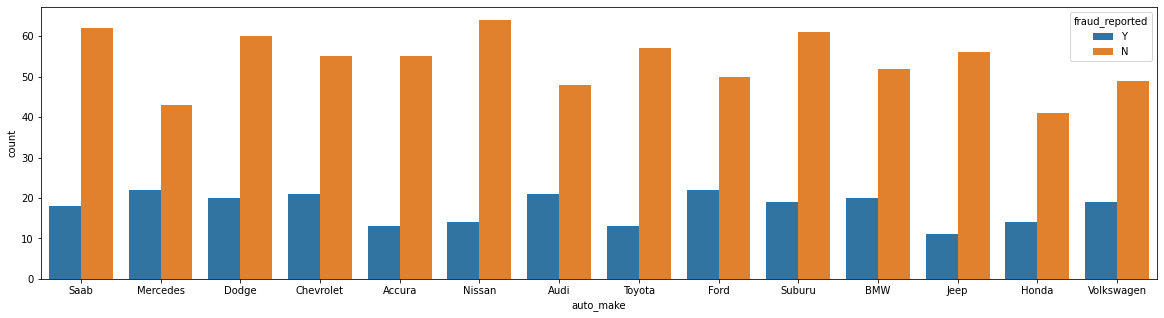

N    753
Y    247
Name: fraud_reported, dtype: int64


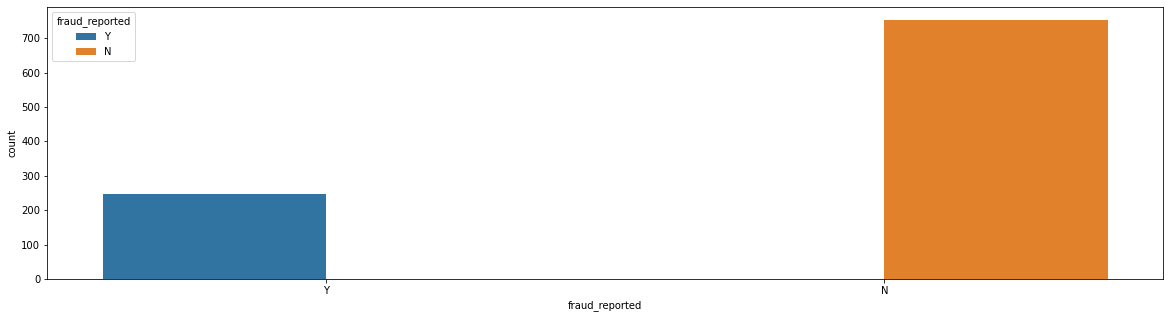

In [55]:
cat=[]
for i in df.columns:
    if df[i].dtypes == 'object':
        cat.append(i)
for i in cat:
    plt.figure(figsize=(20,5))
    sns.countplot(x=i, hue='fraud_reported', data=df)
    print(df[i].value_counts())
    plt.show()

1. We see here that there is not much difference in any city, all the city equalise the number of frauds.


2. Females tend to take more false claims than male.



3. People in JD tends to take more clase claims than others.


4. Exec-managerical levels are more prompt to take fake claims.


5. As expected, people playing chess have the most number of false claims.


6. There is not much difference in family relationship though, still we see here that there is a significant increase in the other-relative part.


7. Most of the false claim made are for Single, multi vehicle collision.


8. Most of the time, false collision made is for rear collision.


9. Most of the false claim is made for Major Damage.


10. Most false claim is made by NY and SC.


11. For the false claim, most of the time, property damage is not done.


12. We do not have POlice report as well for most of the false claims made.


13. Out of 1000, we have 247 people who have made false claims and others were genieune.


Let us now encode just the output column to do further visualisation.

In [56]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
df['fraud_reported']=enc.fit_transform(df['fraud_reported'].values.reshape(-1,1))

In [57]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,YES,1,2,YES,71610,6510,13020,52080,Saab,2004,1.0
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,1,NO,0,0,NO,5070,780,780,3510,Mercedes,2007,1.0
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,2007,0.0
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,1.0
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,1,NO,0,1,NO,6500,1300,650,4550,Accura,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,1,YES,0,1,NO,87200,17440,8720,61040,Honda,2006,0.0
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,1,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,2015,0.0
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,3,NO,2,3,YES,67500,7500,7500,52500,Suburu,1996,0.0
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,1,NO,0,1,YES,46980,5220,5220,36540,Audi,1998,0.0


1 - Yes

0 - No 

In [58]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_make', 'auto_year', 'fraud_reported'],
      dtype='object')

<Figure size 1440x360 with 0 Axes>

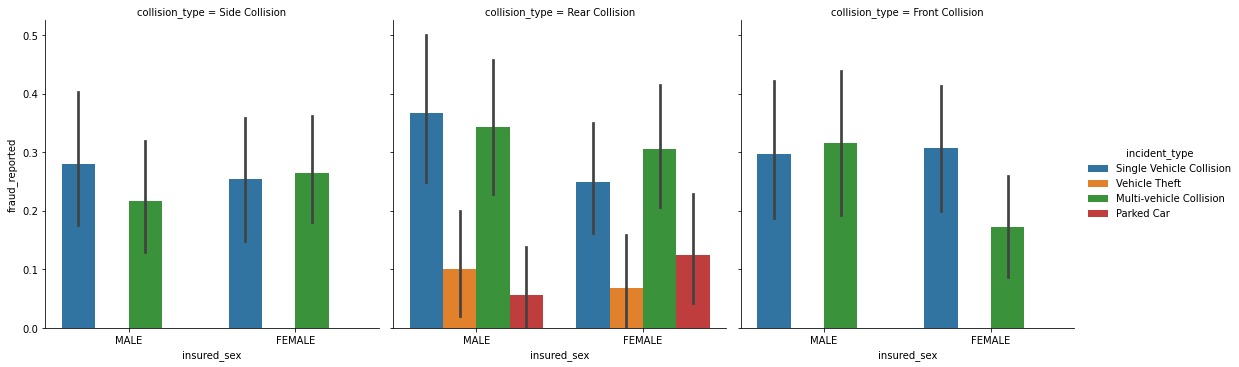

In [59]:
plt.figure(figsize=(20,5))
sns.catplot(x='insured_sex',y='fraud_reported',kind='bar',data=df,col='collision_type',hue='incident_type')

For side collision, we have more males reporting for fraud however moving to others females are more tentative to take fraud claim for rear and Front collision.

<AxesSubplot:xlabel='months_as_customer', ylabel='insured_sex'>

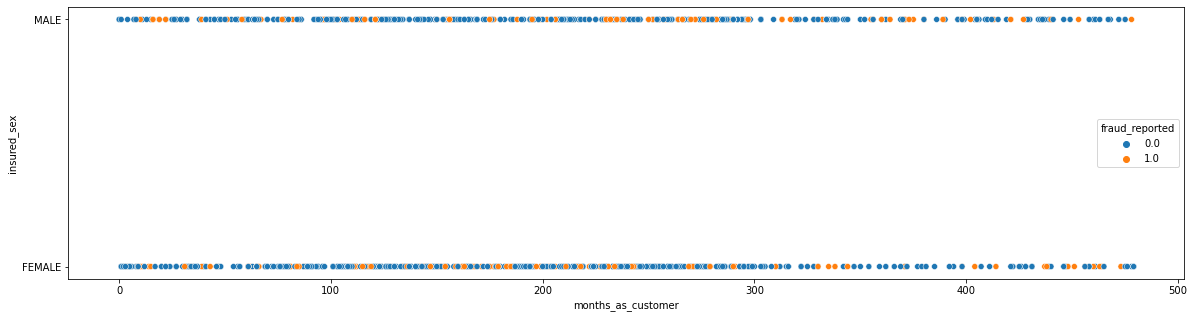

In [60]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='months_as_customer', y='insured_sex',data=df, hue='fraud_reported')

Most of the including male and female sticks to the insurance for longer time.

As expected, with the continuity in months, the age obviously increases.

The more the male stays, there is a lesser probability that they take fraud claims.

<AxesSubplot:xlabel='insured_education_level', ylabel='insured_relationship'>

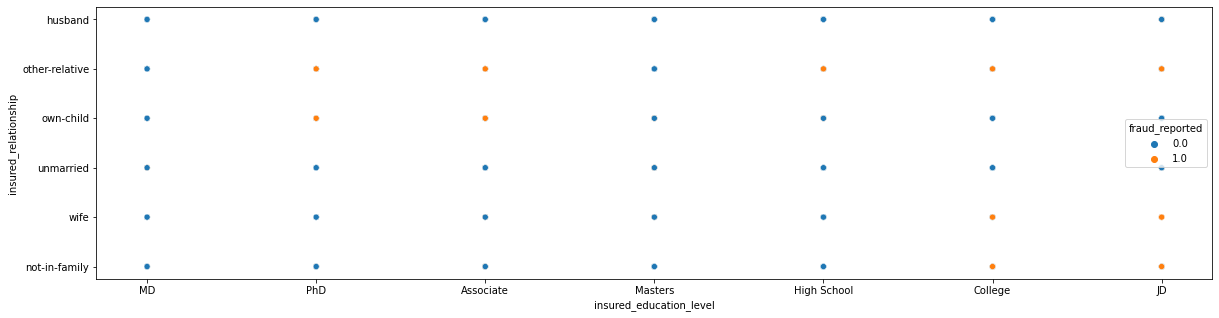

In [61]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='insured_education_level', y='insured_relationship',data=df, hue='fraud_reported')

MD - mostly are liable to true claims

Phd - people having Other relative and own child are more likely yo make fraud claims.

Associate - same as Phd.

Masters  - does not make claim based on the relationship.

High school - make claims depending on other relative.

College - other relative Wife and not in family are more likey to taje false claims.

JD - Same as college.

Basically we can take an intution that people making more claim are dependant to other relative.

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


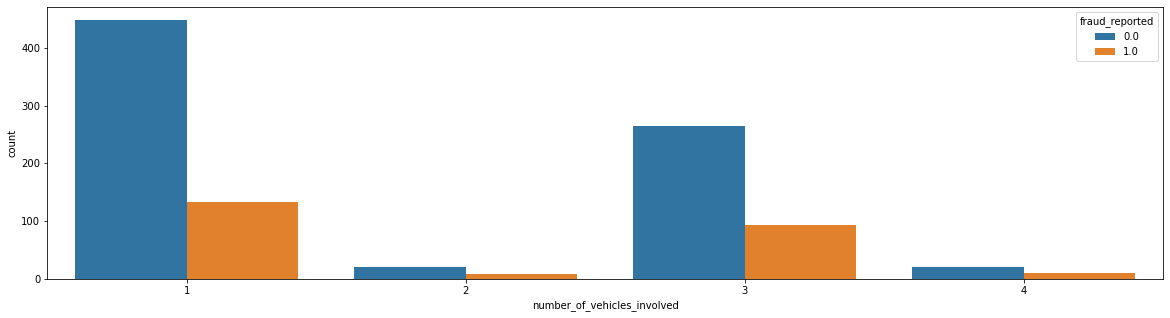

In [62]:
 plt.figure(figsize=(20,5))
sns.countplot(x='number_of_vehicles_involved', hue='fraud_reported', data=df)
print(df['number_of_vehicles_involved'].value_counts())

With this data, we see here that mostly the number of fraud claims that we got are for either 1 or 3 vehicles invloved.

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


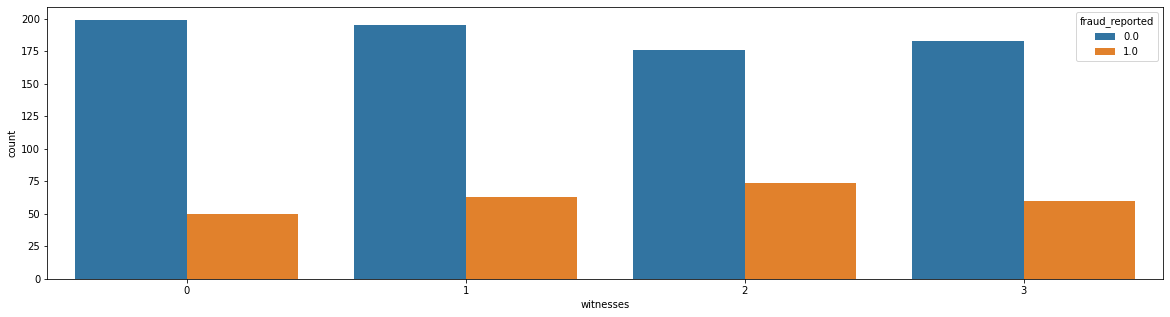

In [63]:
plt.figure(figsize=(20,5))
sns.countplot(x='witnesses', hue='fraud_reported', data=df)
print(df['witnesses'].value_counts())

Number of witness do not matter here as it is almost same for all to get the fraud claims.

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64


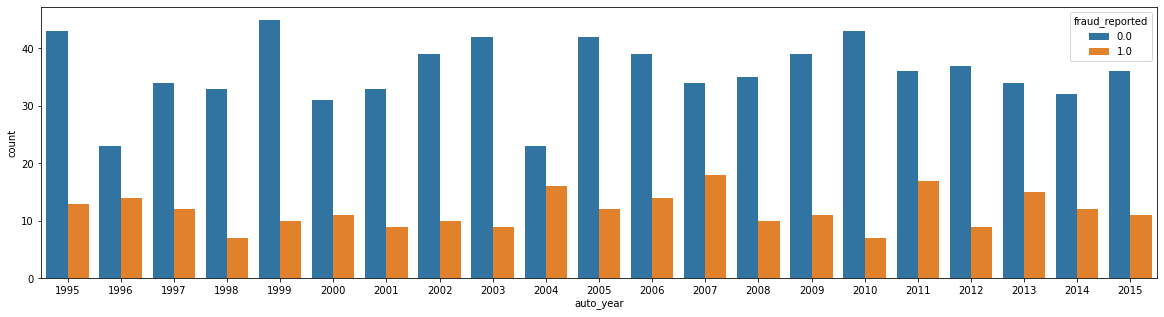

In [64]:
 plt.figure(figsize=(20,5))
sns.countplot(x='auto_year', hue='fraud_reported', data=df)
print(df['auto_year'].value_counts())

We see here that at 1995, 99, 2004, 11 the number of fraud claims are more.

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64


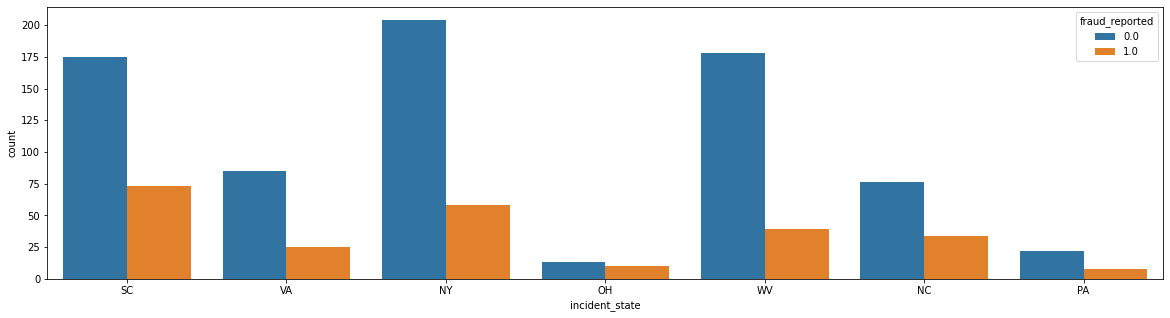

In [65]:
plt.figure(figsize=(20,5))
sns.countplot(x='incident_state', hue='fraud_reported', data=df)
print(df['incident_state'].value_counts())

We see here that SC, NY have taken more claims comparitively and more false claims as well.

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


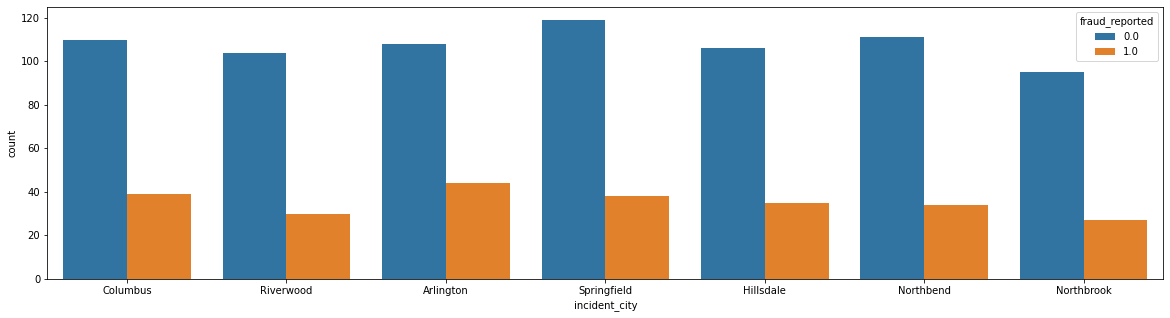

In [66]:
plt.figure(figsize=(20,5))
sns.countplot(x='incident_city', hue='fraud_reported', data=df)
print(df['incident_city'].value_counts())

In all the cities there are almost same number of fraud claims.

<AxesSubplot:>

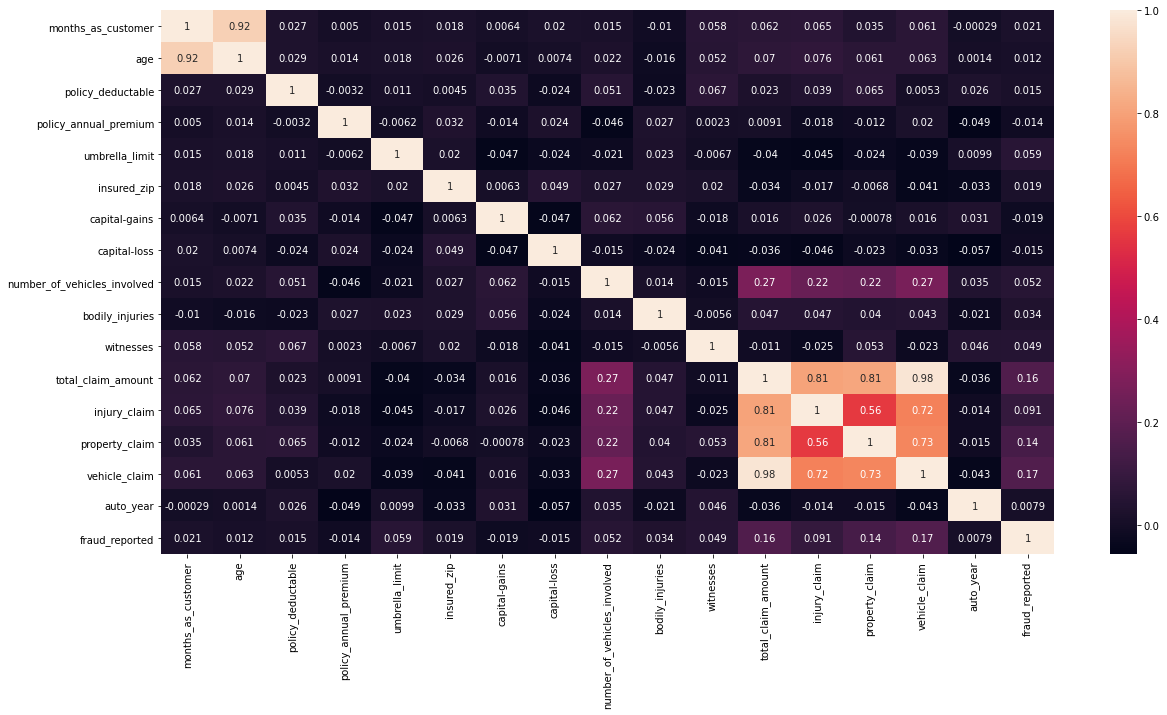

In [67]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

All the claim part like total amount claim, injury claim property claim and vehicle claim are highly correlated.

The reason for it is that total_claim_amount is the sum of columns vehicle claim,property_claim and injury_claim

Also these claims are correlated with number of vehicles invloved as well.

Fraud reported is also directly correlated with these claims.

And obviously, the month the user is there with the insurer is directly correlated with the age.

We will remove the other 3 columns and only keep total_claim_amount as it captures the information and removes collinearity.

Proof:

In [68]:
t = df['total_claim_amount'].iloc[1]
a = df['vehicle_claim'].iloc[1]
b = df['property_claim'].iloc[1]
c = df['injury_claim'].iloc[1]
print(t)
print(a+b+c)

5070
5070


hence we know that both the columns are the same, we will remove these three columns.

In [69]:
df=df.drop(columns=['vehicle_claim','property_claim','injury_claim', ])

In [70]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,YES,1,2,YES,71610,Saab,2004,1.0
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,1,NO,0,0,NO,5070,Mercedes,2007,1.0
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,3,NO,2,3,NO,34650,Dodge,2007,0.0
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,1,NO,1,2,NO,63400,Chevrolet,2014,1.0
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,1,NO,0,1,NO,6500,Accura,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,1,YES,0,1,NO,87200,Honda,2006,0.0
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,1,YES,2,3,NO,108480,Volkswagen,2015,0.0
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,3,NO,2,3,YES,67500,Suburu,1996,0.0
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,1,NO,0,1,YES,46980,Audi,1998,0.0


Now we have 30 columns to work with.

In [71]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,1.83900,0.992000,1.487000,52761.94000,2005.103000,0.247000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,1.01888,0.820127,1.111335,26401.53319,6.015861,0.431483
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,1.00000,0.000000,0.000000,100.00000,1995.000000,0.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,1.00000,0.000000,1.000000,41812.50000,2000.000000,0.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,1.00000,1.000000,1.000000,58055.00000,2005.000000,0.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,3.00000,2.000000,2.000000,70592.50000,2010.000000,0.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,4.00000,2.000000,3.000000,114920.00000,2015.000000,1.000000


Months as customer: the mean is 203 with std dev 115.11
    
Though we are able to see few outliers in months as customer, age, policy premium, etc.,

Will see through all the data and try to process them.


In [76]:
#As we have already read the encoder above, we will encode the rest here.

for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))
            
    

Checking for zscore.

In [77]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 503, 657,
       700, 763, 807, 875, 922, 975], dtype=int64), array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6,  6,  6,  6,  5, 14,  6,
        6,  6], dtype=int64))


In [78]:
dfn = df[(z<3).all(axis=1)]
print(df.shape)
print(dfn.shape)

(1000, 30)
(981, 30)


In [102]:
# percentage of data loss.
data_loss = ((1000-981)/1000)*100
data_loss

1.9

1.9% data is something that we can afford.

Splitting

In [80]:
x=dfn.drop(columns='fraud_reported')
y=dfn['fraud_reported']

In [81]:
x.dtypes

months_as_customer               int64
age                              int64
policy_state                   float64
policy_csl                     float64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                    float64
insured_education_level        float64
insured_occupation             float64
insured_hobbies                float64
insured_relationship           float64
capital-gains                    int64
capital-loss                     int64
incident_type                  float64
collision_type                 float64
incident_severity              float64
authorities_contacted          float64
incident_state                 float64
incident_city                  float64
number_of_vehicles_involved      int64
property_damage                float64
bodily_injuries                  int64
witnesses                        int64
police_report_available  

Now we have all the data in numeric format.


Scaling

In [82]:
x.columns
col=['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'auto_make', 'auto_year']

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

x = pd.DataFrame(x, columns = col)
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_year
0,1.070216,0.984369,1.178383,0.065872,-0.223570,0.621168,-0.467587,-0.485254,1.072994,0.533151,-1.154711,1.275133,-1.437682,1.002902,0.954501,0.760902,1.343348,-1.260366,1.196959,0.350869,-0.974643,-0.819388,1.513918,0.001248,0.464781,1.471229,0.716940,0.852529,-0.188317
1,0.204305,0.330788,-0.025777,0.065872,1.413162,-0.246525,1.891997,-0.456624,1.072994,0.533151,-0.159087,0.923508,-0.248002,-0.907244,0.954501,1.687013,-0.030817,-0.195406,1.196959,0.814755,0.990670,-0.819388,-0.660538,-1.222563,-1.333838,-0.679704,-1.809519,0.355601,0.310977
2,-0.609650,-1.085304,1.178383,-1.176823,1.413162,0.646948,1.891997,-0.982496,-0.931972,1.557678,1.085444,-1.362053,0.346839,0.350657,0.954501,-1.091319,-0.030817,-0.195406,1.196959,-1.040786,-0.974643,1.145942,-0.660538,1.225058,1.364090,-0.679704,-0.686395,-0.638257,0.310977
3,0.446760,0.221858,-1.229938,0.065872,1.413162,0.657707,2.363914,1.503505,-0.931972,1.557678,-1.403618,-1.362053,0.941679,0.845217,-1.279151,0.760902,-1.404982,-1.260366,1.196959,-0.576901,-1.465971,-0.819388,-0.660538,0.001248,0.464781,-0.679704,0.405214,-0.886722,1.475995
4,0.204305,0.548648,-1.229938,1.308566,-0.223570,1.353591,2.363914,1.539768,1.072994,-1.515903,1.085444,-1.362053,0.941679,1.458040,-0.692101,1.687013,-0.030817,-0.195406,-0.107726,-1.040786,-1.465971,-0.819388,-0.660538,-1.222563,-0.434529,-0.679704,-1.755223,-1.632115,0.643839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,-1.743993,-0.104933,1.178383,1.308566,-0.223570,0.223467,-0.467587,-0.973293,-0.931972,1.045414,-1.154711,0.571883,0.941679,-0.907244,0.954501,0.760902,-1.404982,-0.195406,-0.760069,-1.504672,0.499342,-0.819388,1.513918,-1.222563,-0.434529,-0.679704,1.308877,-0.141328,0.144546
977,0.697874,0.221858,-1.229938,-1.176823,-0.223570,0.744811,-0.467587,1.504345,-0.931972,1.557678,0.587632,1.275133,1.536519,1.633645,0.954501,0.760902,-0.030817,-1.260366,-0.760069,0.350869,0.008014,-0.819388,1.513918,1.225058,1.364090,-0.679704,2.116858,1.597923,1.642426
978,-0.644287,-0.540653,1.178383,0.065872,-1.041936,0.524257,0.948164,-0.812103,-0.931972,1.045414,-1.403618,-1.186241,-0.248002,0.350657,0.954501,-1.091319,1.343348,-0.195406,1.196959,-1.504672,-1.465971,1.145942,-0.660538,1.225058,1.364090,1.471229,0.560887,1.100994,-1.519765
979,2.195899,2.509392,-1.229938,1.308566,1.413162,0.414311,1.891997,-0.827272,1.072994,-1.515903,-0.407993,-1.713678,1.536519,-0.907244,0.954501,0.760902,-0.030817,-1.260366,0.544616,-1.040786,-1.465971,-0.819388,-0.660538,-1.222563,-0.434529,1.471229,-0.218237,-1.383651,-1.186903


### Modelling

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.30,random_state=25)

Not using for loop for test and random state as we usually work on getting the best random state and use that for other models as well, however there is a possibility the the random value chanage with the model we use to get the best random state or test size hence not using that and assuming mostly used 30 7- split for test and a random value for random state as I presume that it might not bring a big difference in the data.

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [86]:
lr = LogisticRegression()
gnb=GaussianNB()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()

In [87]:
model=[lr,knc,dtc,svc,rf,ada,gnb]
for m in model:
    print('The model is: ',m)
    m.fit(x_train,y_train)
    predict=m.predict(x_test)
    pred_train=m.predict(x_train)
    print('Accuracy score for the training : ',accuracy_score(y_train,pred_train))
    print('Accuracy score for the model is: ',accuracy_score(y_test,predict))
    print('Calssification Report is: ',classification_report(y_test,predict))
    print('Confusion Matrix is: ',confusion_matrix(y_test,predict))
    print('\n\n')

The model is:  LogisticRegression()
Accuracy score for the training :  0.8134110787172012
Accuracy score for the model is:  0.7694915254237288
Calssification Report is:                precision    recall  f1-score   support

         0.0       0.81      0.91      0.86       224
         1.0       0.53      0.32      0.40        71

    accuracy                           0.77       295
   macro avg       0.67      0.62      0.63       295
weighted avg       0.74      0.77      0.75       295

Confusion Matrix is:  [[204  20]
 [ 48  23]]



The model is:  KNeighborsClassifier()
Accuracy score for the training :  0.8134110787172012
Accuracy score for the model is:  0.7457627118644068
Calssification Report is:                precision    recall  f1-score   support

         0.0       0.77      0.94      0.85       224
         1.0       0.41      0.13      0.19        71

    accuracy                           0.75       295
   macro avg       0.59      0.53      0.52       295
weighted av

Cross validation.

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
model = [lr, knc, dtc, svc, rf, ada, gnb]
for m in model:
    print('The model is: \n',m)
    for j in range (2,10):
        train_accuracy = accuracy_score(y_train, pred_train)
        test_accuracy = accuracy_score(y_test, predict)
        cv_score = cross_val_score(m, x, y, cv = j)
        cv_mean = cv_score.mean()
        print(f'At cross fold {j} the cv score is {cv_mean}')
        print('\n\n')

The model is: 
 LogisticRegression()
At cross fold 2 the cv score is 0.7726796624963631



At cross fold 3 the cv score is 0.762487257900102



At cross fold 4 the cv score is 0.7624771859963497



At cross fold 5 the cv score is 0.7675593079871543



At cross fold 6 the cv score is 0.7594393735348396



At cross fold 7 the cv score is 0.7655521783181357



At cross fold 8 the cv score is 0.7625533120085299



At cross fold 9 the cv score is 0.7675840978593274



The model is: 
 KNeighborsClassifier()
At cross fold 2 the cv score is 0.727829502473087



At cross fold 3 the cv score is 0.7247706422018348



At cross fold 4 the cv score is 0.7206860793097727



At cross fold 5 the cv score is 0.7298611830519011



At cross fold 6 the cv score is 0.7309279764576787



At cross fold 7 the cv score is 0.7257996815747576



At cross fold 8 the cv score is 0.728858456617353



At cross fold 9 the cv score is 0.726809378185525



The model is: 
 DecisionTreeClassifier()
At cross fold 2 the cv 

We are getting best accuracy in DecisionTree Classifier.

Test: 81.01


training: 1.0

    
    79.5 at cv 4 for the model hence its a pretty well performing model.

AUC ROC curve.

In [89]:
from sklearn.metrics import roc_curve,roc_auc_score
y_predprob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_predprob)


In [90]:
fpr

array([0.   , 0.125, 1.   ])

In [91]:
tpr

array([0.        , 0.64788732, 1.        ])

In [92]:
thresholds

array([2., 1., 0.])

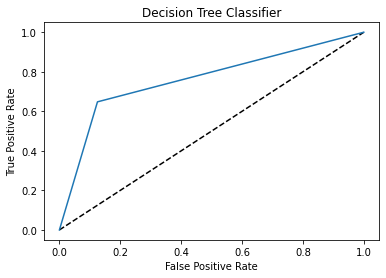

In [101]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Adaboost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier')
plt.show()

In [94]:
Auc_score=roc_auc_score(y_test,lr.predict(x_test))

In [95]:
Auc_score

0.6173289738430583

It do not seem a bad Auc score.

Grid Search

In [96]:
from sklearn.model_selection import GridSearchCV
param = {'criterion':['gini', 'entropy'],'splitter':['best', 'random'],'max_features':['log2','auto','sqrt']}

modeldtr = DecisionTreeClassifier()

grids = GridSearchCV(modeldtr,param,cv=4)


grid_result = grids.fit(x_train, y_train)


print(grids.best_params_)

print('Best Score: ', grid_result.best_score_)

{'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}
Best Score:  0.7377175982592139


In [97]:
dtr=DecisionTreeClassifier(criterion='entropy',max_features='auto',splitter='best')

In [98]:
dtr.fit(x_train, y_train)
dtr.score(x_train, y_train)
preddtr = dtr.predict(x_test)
data = [preddtr, y_test]
pd.DataFrame(data, index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294
Predicted,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
Actual,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
print('Errors:')
print('\n')
print('Accuracy score for the training : ',accuracy_score(y_train,pred_train))
print('Accuracy score for the model is: ',accuracy_score(y_test,predict))
print('Calssification Report is: ',classification_report(y_test,predict))
print('Confusion Matrix is: ',confusion_matrix(y_test,predict))
print('\n\n')

Errors:


Accuracy score for the training :  0.7798833819241983
Accuracy score for the model is:  0.7661016949152543
Calssification Report is:                precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       224
         1.0       0.52      0.44      0.47        71

    accuracy                           0.77       295
   macro avg       0.67      0.65      0.66       295
weighted avg       0.75      0.77      0.76       295

Confusion Matrix is:  [[195  29]
 [ 40  31]]





In [100]:
joblib.dump(lr, 'insurancedtr.obj')

['insurancedtr.obj']